# Getting started with Named Entity Recognition

## Introduction

As human beings we are adept at deriving meaning from text/language to such an extent that it tends to happen without us noticing it. We will parse a sentence for meaning without realising we are doing it most of the time. However, if we are asking a computer to do the same thing, it soon becomes clear that the set of decisions our brains make is quite complex and hard to fully explain.

For example, take the following sentence from the opening paragraph of the State Library Victoria's Wikipedia entry:

*Located in Melbourne, it was established in 1854 as the Melbourne Public Library, making it Australia's oldest public library and one of the first free libraries in the world.*

Most people will immediately pick out "1854" as a date, and "Melbourne Public Library" as an organisation, whilst the initial mention of Melbourne, though related will have a subtly different meaning. These are all key words or phrases that ur brains can recognise and contextualise with little apparent effort. Named Entity Recognition (NER) is an establised field within the computer sciences that attempts to replicate this ability.

### Named Entity Recognition

Named Entity Recognition (NER) identifies the most important words and phrases in text. As a branch of Natural Language Processing (NLP), it uses statistical analysis and machine learning to help computers understand written language.
NLP has gained prominence recently because it powers large language models like ChatGPT. This growing interest has led to many tools and packages for performing NER tasks.

This guide will:

  - Break down the three main steps in the NER process
  - Show practical examples of each step
  - Help you select the right NER package for your specific needs

Although this introduction to NER can be read as prose, it is intended to be a practical hands-on guide. It has therefore been deployed as a "code-along" Jupyter notebook on the following platform:

- [Colab](https://colab.research.google.com/github/StateLibraryVictoria-SLVLAB/how-to-guides/blob/main/theatre-programs-prototype/SLV_LAB_getting_started_NER.ipynb)

## Overview of the process

Typically NER is broken down into these steps:

1. Tokenisation: breaking down text into its constituent parts
2. Parts of Sentence" (POS) classification: categorising the tokens accosrding to their linguistic function e.g. verb, noun, punctuation etc.
3. Entity recognition: "chunking" the classified tokens into entities, and classifying by typw of entity e.g. person, location, date etc.

There are many Python packages that can be used to perform NER, and frequently they don't make explicit the three steps being undertaken. Typically, that's not a problem, however, to help understand the process this resource will step through the process using the Python package `NLTK`.

### Installing NLTK and relevant data

NLTK or "Natural Language Toolkit" is an open source project that aims to provide a variety of tools for working with human language data: [https://www.nltk.org/](https://www.nltk.org/)

In Python, NLTK can be installed using pip. **Note** we'll also install `svgling` that is used later in this guide to create a visualisation of the NER output.

In [ ]:
! pip install nltk svgling

### Downloading language data

NLTK also provides an interface for working with over 50 language-based datasets.

In [ ]:
import nltk
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('maxent_ne_chunker_tab')
nltk.download('words')
nltk.download('tagsets_json')

To help demonstrate how NER works, we will use the first sentence of the State Library Victoria's Wikipedia page ([https://en.wikipedia.org/wiki/State_Library_Victoria](https://en.wikipedia.org/wiki/State_Library_Victoria)).

In [3]:
about_slv = """
    Located in Melbourne, it was established in 1854 as the Melbourne Public Library,
    making it Australia's oldest public library and one of the first free libraries in the world.
    """

### 1. Tokenisation

In simple terms, Tokenisation is breaking the down of a body of text into its constituent parts, most frequently words, but also other parts of language like punctuation.

By breaking down the text into tokens, each token can then be analysed and categorised.

In [4]:
tokens = nltk.word_tokenize(about_slv)

tokens

['Located',
 'in',
 'Melbourne',
 ',',
 'it',
 'was',
 'established',
 'in',
 '1854',
 'as',
 'the',
 'Melbourne',
 'Public',
 'Library',
 ',',
 'making',
 'it',
 'Australia',
 "'s",
 'oldest',
 'public',
 'library',
 'and',
 'one',
 'of',
 'the',
 'first',
 'free',
 'libraries',
 'in',
 'the',
 'world',
 '.']

Tokenisation is in itself a field of NLP research, and for some tasks it may be worth investigating different tokenisation methods/approaches. However, for many use cases the "built in" tokenisers are usually more than appropriate.

### 2. Parts of Sentence (POS) classification

With the body of text being tokenised, each one is categorised linguistically. They are put into categories according to which part of a sentence (POS) they are. For example, whether a token is a noun or verb.


In [5]:
tagged_tokens = nltk.pos_tag(tokens)

tagged_tokens

[('Located', 'VBN'),
 ('in', 'IN'),
 ('Melbourne', 'NNP'),
 (',', ','),
 ('it', 'PRP'),
 ('was', 'VBD'),
 ('established', 'VBN'),
 ('in', 'IN'),
 ('1854', 'CD'),
 ('as', 'IN'),
 ('the', 'DT'),
 ('Melbourne', 'NNP'),
 ('Public', 'NNP'),
 ('Library', 'NNP'),
 (',', ','),
 ('making', 'VBG'),
 ('it', 'PRP'),
 ('Australia', 'NNP'),
 ("'s", 'POS'),
 ('oldest', 'JJS'),
 ('public', 'JJ'),
 ('library', 'NN'),
 ('and', 'CC'),
 ('one', 'CD'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('first', 'JJ'),
 ('free', 'JJ'),
 ('libraries', 'NNS'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('world', 'NN'),
 ('.', '.')]

As the parts of sentence output demonstrates, each token is assigned to a linguistic category e.g. `('State', 'NNP')`. However, it is not always immediately apparent what the category is. NLTK provides a method for checking what a given POS code is, as well as examples of the POS category from its training data.

In [6]:
nltk.help.upenn_tagset('NNP')

NNP: noun, proper, singular
    Motown Venneboerger Czestochwa Ranzer Conchita Trumplane Christos
    Oceanside Escobar Kreisler Sawyer Cougar Yvette Ervin ODI Darryl CTCA
    Shannon A.K.C. Meltex Liverpool ...


The linguistic categories also exist with higher order categories and share the same opening characters e.g. NNP, NNS. A 'wildcard' operator can be used to check these categories too.

In [7]:
nltk.help.upenn_tagset('NN*')

NN: noun, common, singular or mass
    common-carrier cabbage knuckle-duster Casino afghan shed thermostat
    investment slide humour falloff slick wind hyena override subhumanity
    machinist ...
NNP: noun, proper, singular
    Motown Venneboerger Czestochwa Ranzer Conchita Trumplane Christos
    Oceanside Escobar Kreisler Sawyer Cougar Yvette Ervin ODI Darryl CTCA
    Shannon A.K.C. Meltex Liverpool ...
NNPS: noun, proper, plural
    Americans Americas Amharas Amityvilles Amusements Anarcho-Syndicalists
    Andalusians Andes Andruses Angels Animals Anthony Antilles Antiques
    Apache Apaches Apocrypha ...
NNS: noun, common, plural
    undergraduates scotches bric-a-brac products bodyguards facets coasts
    divestitures storehouses designs clubs fragrances averages
    subjectivists apprehensions muses factory-jobs ...


### 3. Entity recognition

With the text broken into tokens that have then beem categorised. The categorised tokens can then be analysed, and entity recognition attempted. The entities are based on categories used in the creation of statistical model underlying the NER process.

The categories that entities are added to in NLTK:
- Persons
- Organizations
- Locations
- Facilities
- Geographical Political Entities (GPE)


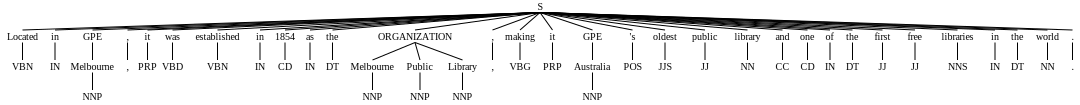

In [8]:
import svgling
entities = nltk.ne_chunk(tagged_tokens)

svgling.draw_tree(entities, font_size=10)

The NER results are represented as a tree. With the sentence (`S`) the root, and "token" branches extended from it, with POS leaves. Where words or phrases have been recognised as entities they are given a sub-branch according to the category of entity.

The tree diagram created from our test input displays three entities that have been recognised:

  1. Melbourne (GPE)
  2. Melbourne Public Library (Organization)
  3. Australia (GPE)

Referring back to the list of entity categories that NLTK employs the results are as expected.

## Conclusion

Our journey through Named Entity Recognition has shown how computers can extract the most valuable information from ordinary text. By breaking language into tokens, identifying parts of speech, and recognising meaningful entities, NER transforms raw text into structured data that computers and humans can easily parse.

While we've explored the three key steps in this process, the good news is that you don't need to build everything from scratch. Many Python packages come with default settings that tend to embody best practices and will serve most standard use cases.

The most important decision you'll make is selecting the right package or model for your specific needs. This choice determines what kind of entities you'll extract and how they'll be formatted, whether you need to identify people's names, locations or dates.

As you apply these techniques to your own projects, you'll discover how NER can reveal patterns and insights hidden within text, turning unstructured information into actionable knowledge.



For example, the Flair and SpaCy NLP packages offer Enlgish language models trained on 18 different entity categories:
  - Flair [https://huggingface.co/flair/ner-english-ontonotes-large](https://huggingface.co/flair/ner-english-ontonotes-large)
  - SpaCy [https://huggingface.co/spacy/en_core_web_sm](https://huggingface.co/spacy/en_core_web_sm)



## References

Bird, Steven, Edward Loper and Ewan Klein (2009), Natural Language Processing with Python. O’Reilly Media Inc.